### **Binary Logistic Regression with Scikit-Learn**


**Import necessary libraries**


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

**Load and Explore the Data**


In [122]:
data = pd.read_csv("Social_Network_Ads.csv")

In [123]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


---


**Show Data Details**


In [124]:
data.shape

(400, 3)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [126]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [127]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


---


**Visualize the data**


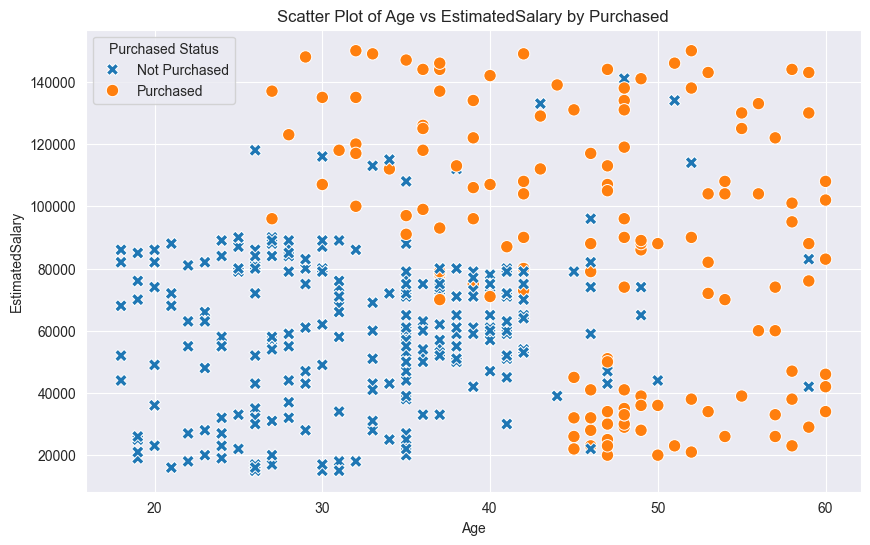

In [128]:
def plot_scatter(data, x_feature, y_feature, target):
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        x=x_feature,
        y=y_feature,
        data=data,
        hue=target,
        style=target,
        markers={0: "X", 1: "o"},
        s=80,
    )

    # Extracting legend handles and labels
    handles, labels = scatter.get_legend_handles_labels()
    scatter.legend(
        handles=handles,
        labels=[f"Not {target}", target],
        title=f"{target} Status",
    )

    plt.title(f"Scatter Plot of {x_feature} vs {y_feature} by {target}")
    plt.show()


plot_scatter(data, "Age", "EstimatedSalary", "Purchased")

---


**Prepare the Data for Modeling**


In [129]:
X = data.drop("Purchased", axis=1).values
y = data["Purchased"].values.reshape(-1, 1)

**Splitting the Dataset into Training and Testing Sets**


In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

In [131]:
y_train.shape, y_test.shape

((268, 1), (132, 1))

**Feature Scaling**


In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Training the Logistic Regression Model**

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(X_train, y_train.ravel())

LogisticRegression(random_state=42)

**Predicting the Test Set Results**


In [136]:
y_test_pred = logistic_reg_model.predict(X_test)

**Evaluate the Model**


In [137]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

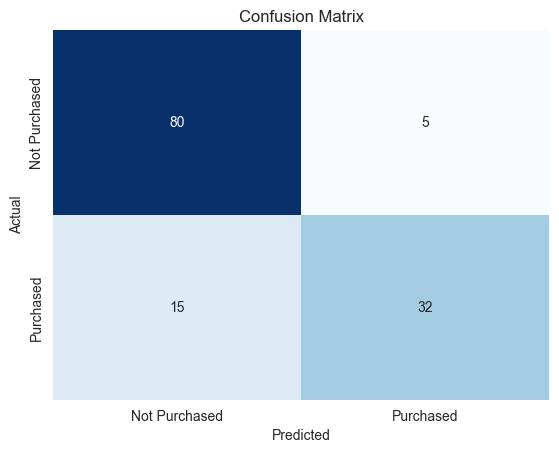

In [138]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = ["Not Purchased", "Purchased"]
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [139]:
# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy:.6f}")

Test Accuracy: 0.848485


In [140]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        85
           1       0.86      0.68      0.76        47

    accuracy                           0.85       132
   macro avg       0.85      0.81      0.83       132
weighted avg       0.85      0.85      0.84       132



**Plotting Decision Boundary Fot Test Data**


In [141]:
def plot_decision_boundary(
    model, X, y, scaler=None, step_size=0.1, xlabel=None, ylabel=None
):
    if scaler != None:
        X = scaler.inverse_transform(X)
    y = y.ravel()

    # Calculate range based on feature median for coverage
    x_range, y_range = np.median(X[:, 0]) / 4, np.median(X[:, 1]) / 4
    x_min, x_max = X[:, 0].min() - x_range, X[:, 0].max() + x_range
    y_min, y_max = X[:, 1].min() - y_range, X[:, 1].max() + y_range

    # Define step size for mesh grid
    # step_size -> Increase the step size to reduce memory usage
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size)
    )

    # Predict on the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if scaler == None:
        Z = model.predict(grid_points).reshape(xx.shape)
    else:
        Z = model.predict(scaler.transform(grid_points)).reshape(xx.shape)

    plt.figure(figsize=(8, 6))

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="Paired", alpha=0.75)

    # Plot data points
    # plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="k")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary with Data Points")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

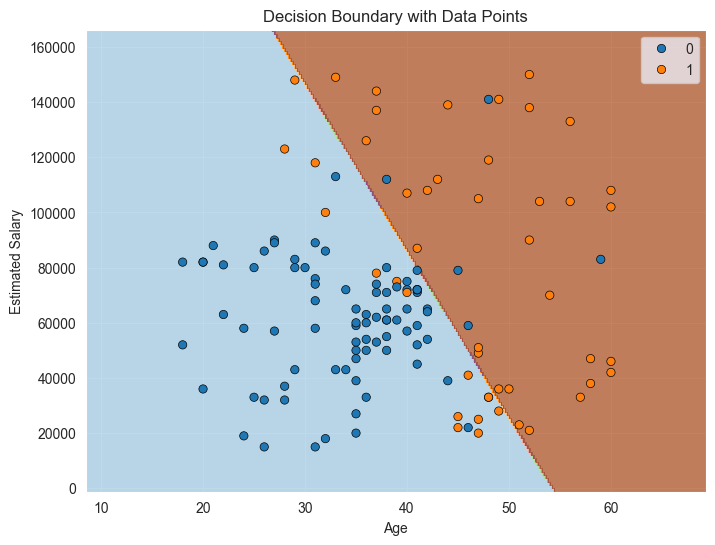

In [142]:
plot_decision_boundary(
    logistic_reg_model,
    X_test,
    y_test,
    scaler=scaler,
    xlabel="Age",
    ylabel="Estimated Salary",
    step_size=0.2,
)

**Evaluate Training Data**


In [143]:
y_train_pred = logistic_reg_model.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy:.6f}")

Accuracy: 0.843284


**Plotting Decision Boundary Fot Train Data**

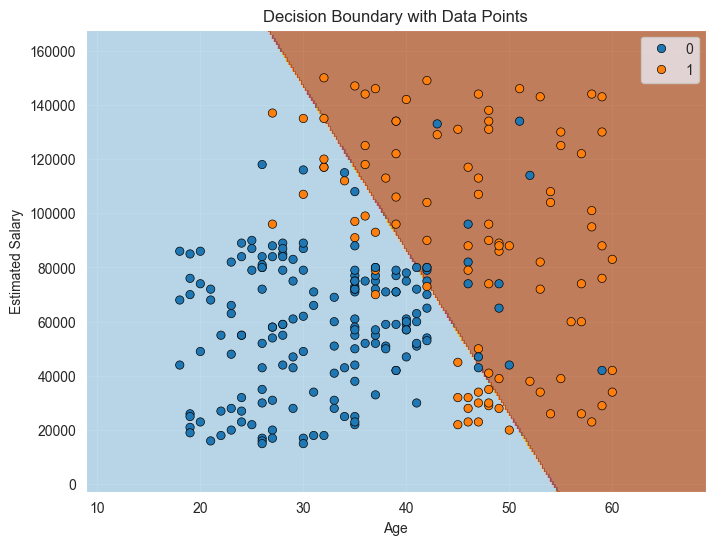

In [144]:
plot_decision_boundary(
    logistic_reg_model,
    X_train,
    y_train,
    scaler=scaler,
    xlabel="Age",
    ylabel="Estimated Salary",
    step_size=0.2,
)